In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv("dataset_Facebook.csv" , sep= ';')

In [4]:
ds

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [4]:
ds.shape

(500, 19)

In [5]:
ds.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [6]:
mean_paid = ds['Paid'].mean()
ds['Paid'] = ds['Paid'].fillna(mean_paid)

In [7]:
ds2 = ds[["Page total likes", "Type"]]
ds2

,Page total likes,Type
0,139441,Photo
1,139441,Status
2,139441,Photo
3,139441,Photo
4,139441,Photo
...,...,...
495,85093,Photo
496,81370,Photo
497,81370,Photo
498,81370,Photo


In [8]:
ds3 = ds[["Type" , "comment", "like", "share"]]
ds3

,Type,comment,like,share
0,Photo,4,79.0,17.0
1,Status,5,130.0,29.0
2,Photo,0,66.0,14.0
3,Photo,58,1572.0,147.0
4,Photo,19,325.0,49.0
...,...,...,...,...
495,Photo,5,53.0,26.0
496,Photo,0,53.0,22.0
497,Photo,4,93.0,18.0
498,Photo,7,91.0,38.0


In [1]:
ds2.loc[:, "unique_id"] = ds2.groupby("Type").cumcount()
ds3.loc[:, "unique_id"] = ds3.groupby("Type").cumcount()

merged_ds = pd.merge(ds2, ds3, on=["Type", "unique_id"], how="inner")

merged_ds

NameError: name 'ds2' is not defined

In [10]:
ds2.loc[:, "unique_id"] = ds2.groupby("Type").cumcount()
ds3.loc[:, "unique_id"] = ds3.groupby("Type").cumcount()

merged_ds = pd.merge(ds2, ds3, on=["Type", "unique_id"], how="inner")

merged_ds = merged_ds.drop(columns=["unique_id"])

merged_ds

,Page total likes,Type,comment,like,share
0,139441,Photo,4,79.0,17.0
1,139441,Status,5,130.0,29.0
2,139441,Photo,0,66.0,14.0
3,139441,Photo,58,1572.0,147.0
4,139441,Photo,19,325.0,49.0
...,...,...,...,...,...
495,85093,Photo,5,53.0,26.0
496,81370,Photo,0,53.0,22.0
497,81370,Photo,4,93.0,18.0
498,81370,Photo,7,91.0,38.0


In [11]:
ds4 = ds[["Type", "Paid"]]
ds4

,Type,Paid
0,Photo,0.000000
1,Status,0.000000
2,Photo,0.000000
3,Photo,1.000000
4,Photo,0.000000
...,...,...
495,Photo,0.000000
496,Photo,0.000000
497,Photo,0.000000
498,Photo,0.000000


In [12]:
ds5= ds.loc[ds["Page total likes"] > 100000]
ds5

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,100732,Photo,1,3,6,17,0.0,11420,23855,1411,1342,8049,16634,8032,865,12,211.0,14.0,237
434,100732,Photo,1,3,6,15,0.0,5704,10510,452,450,2895,9348,5388,361,1,15.0,1.0,17
435,100732,Photo,1,3,6,15,0.0,7192,12811,587,554,3941,11519,6616,472,11,95.0,4.0,110
436,100732,Photo,1,3,6,13,1.0,9604,16557,1061,1037,9614,13618,7984,705,16,127.0,0.0,143


In [13]:
ds6= ds[ds["Page total likes"] > 100000 & ds["Post Month"]]
ds6

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.000000,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.000000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.000000,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.000000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.000000,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.000000,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.000000,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.000000,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.000000,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [14]:
ds7= ds[(ds['Category'] == 1) ]
ds7

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
17,138414,Photo,1,12,2,12,1.0,53264,111785,1706,1103,1655,92512,39776,1307,15,678.0,20.0,713
21,138414,Photo,1,12,7,10,0.0,1384,2467,15,15,20,2196,1172,15,0,0.0,0.0,0
22,138414,Link,1,12,7,10,0.0,3454,6853,118,104,130,6282,3100,106,0,16.0,2.0,18
29,138895,Video,1,12,4,11,1.0,36208,61262,1141,1068,1728,30131,14112,559,18,143.0,13.0,174
34,138895,Photo,1,12,2,3,0.0,3766,7149,298,260,431,5782,2938,244,2,56.0,17.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,86909,Link,1,1,6,4,0.0,39600,7927,572,496,581,12522,8176,167,1,101.0,5.0,107
481,86491,Link,1,1,4,4,1.0,4938,7910,66,63,70,6625,3804,59,0,5.0,2.0,7
485,86491,Link,1,1,2,2,0.0,5168,8371,66,59,71,7041,3996,58,0,12.0,2.0,14
492,85979,Link,1,1,5,11,0.0,45920,5808,753,655,763,15766,10720,220,0,128.0,9.0,137


In [15]:
ds10 = ds.iloc[300:310, 0:4]
ds10

,Page total likes,Type,Category,Post Month
300,124940,Photo,2,6
301,124940,Photo,3,6
302,124940,Photo,1,6
303,124940,Photo,3,6
304,124940,Photo,1,6
305,124940,Photo,3,6
306,124940,Photo,2,6
307,124940,Photo,3,6
308,124940,Photo,3,6
309,124940,Photo,3,6


In [7]:
ds11 =ds.iloc[10:20, 0:4]
ds11

,Page total likes,Type,Category,Post Month
10,139441,Status,2,12
11,139441,Photo,2,12
12,139441,Photo,2,12
13,139441,Photo,2,12
14,138414,Photo,2,12
15,138414,Status,2,12
16,138414,Photo,3,12
17,138414,Photo,1,12
18,138414,Status,3,12
19,138414,Photo,3,12


In [8]:
row_merge = pd.concat([ds10, ds11])
row_merge

NameError: name 'ds10' is not defined

In [9]:
ds.sort_values(by='Total Interactions', ascending=True)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
417,104070,Photo,1,3,3,10,0.0,1874,2474,25,25,31,1483,1062,15,0,0.0,0.0,0
21,138414,Photo,1,12,7,10,0.0,1384,2467,15,15,20,2196,1172,15,0,0.0,0.0,0
441,98195,Photo,1,3,5,4,1.0,1845,2670,9,9,9,1614,1008,9,0,0.0,0.0,0
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
100,137020,Photo,1,10,4,9,1.0,1357,2453,37,37,55,2154,1120,32,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,117764,Photo,3,5,5,13,0.0,81856,124753,3000,1637,2718,52477,27392,1756,45,1639.0,122.0,1806
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
379,111620,Photo,3,4,1,14,1.0,105632,147918,3984,2254,3391,48575,27328,1936,51,1998.0,128.0,2177


In [10]:
ds.sort_values(by='Lifetime Post Consumptions', ascending=False)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
278,126345,Photo,1,6,2,9,1.0,5854,11854,1043,947,19779,5901,2894,583,11,202.0,5.0,218
446,96749,Photo,1,3,1,2,1.0,98816,125026,11452,11328,18115,16682,10336,1356,10,197.0,21.0,228
268,128032,Photo,1,7,5,3,0.0,6408,11881,909,861,14974,7243,4040,490,26,162.0,7.0,195
42,138353,Photo,1,12,5,10,0.0,7268,13989,2087,2079,12074,13544,7096,1975,7,26.0,3.0,36
427,100732,Photo,1,3,7,17,0.0,10844,22468,1409,1339,11064,18310,8848,1086,4,213.0,13.0,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,104070,Photo,1,3,3,10,0.0,1874,2474,25,25,31,1483,1062,15,0,0.0,0.0,0
430,100732,Link,1,3,7,14,0.0,2933,5144,24,23,26,3972,2012,19,0,6.0,0.0,6
21,138414,Photo,1,12,7,10,0.0,1384,2467,15,15,20,2196,1172,15,0,0.0,0.0,0
76,137893,Photo,1,11,3,2,0.0,1228,2392,17,17,19,2392,1228,17,0,0.0,0.0,0


In [11]:
transpose_ds = ds.transpose()
transpose_ds

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Page total likes,139441,139441,139441,139441,139441,139441,139441,139441,139441,139441,...,85979,85979,85979,85093,85093,85093,81370,81370,81370,81370
Type,Photo,Status,Photo,Photo,Photo,Status,Photo,Photo,Status,Photo,...,Photo,Photo,Link,Photo,Photo,Photo,Photo,Photo,Photo,Photo
Category,2,2,3,2,2,2,3,3,2,3,...,3,3,1,3,3,3,2,1,3,2
Post Month,12,12,12,12,12,12,12,12,12,12,...,1,1,1,1,1,1,1,1,1,1
Post Weekday,4,3,3,2,2,1,1,7,7,6,...,6,6,5,1,7,7,5,5,4,4
Post Hour,3,10,3,10,3,9,3,9,3,10,...,11,3,11,2,10,2,8,2,11,4
Paid,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Lifetime Post Total Reach,2752,10460,2413,50128,7244,10472,11692,13720,11844,4694,...,5280,6184,45920,8412,5400,4684,3480,3778,4156,4188
Lifetime Post Total Impressions,5091,19057,4373,87991,13594,20849,19479,24137,22538,8668,...,8703,10228,5808,13960,9218,7536,6229,7216,7564,7292
Lifetime Engaged Users,178,1457,177,2211,671,1191,481,537,1530,280,...,951,956,753,1179,810,733,537,625,626,564


In [12]:
ds11

,Page total likes,Type,Category,Post Month
10,139441,Status,2,12
11,139441,Photo,2,12
12,139441,Photo,2,12
13,139441,Photo,2,12
14,138414,Photo,2,12
15,138414,Status,2,12
16,138414,Photo,3,12
17,138414,Photo,1,12
18,138414,Status,3,12
19,138414,Photo,3,12


# 

In [22]:
ds_melt = pd.melt(ds11, id_vars=['Type'], value_vars=['Page total likes', 'Category', 'Post Month'])
ds_melt

,Type,variable,value
0,Status,Page total likes,139441
1,Photo,Page total likes,139441
2,Photo,Page total likes,139441
3,Photo,Page total likes,139441
4,Photo,Page total likes,138414
5,Status,Page total likes,138414
6,Photo,Page total likes,138414
7,Photo,Page total likes,138414
8,Status,Page total likes,138414
9,Photo,Page total likes,138414


In [23]:
pivot_table = ds.pivot_table(index='Type', columns='Post Month', values=['Lifetime Post Total Reach', 'Lifetime Engaged Users'], aggfunc={'Lifetime Engaged Users': 'mean', 'Lifetime Post Total Reach': 'max'})
pivot_table

Lifetime Engaged Users                                     \
Post Month                     1        2            3            4    
Type                                                                   
Link                   364.250000   448.00   136.333333   683.666667   
Photo                 1161.619048  1517.08  1061.125000   856.434783   
Status                        NaN      NaN   951.000000  2750.000000   
Video                         NaN      NaN          NaN          NaN   

                                                                            \
Post Month           5           6            7            8            9    
Type                                                                         
Link         344.000000         NaN          NaN          NaN          NaN   
Photo        805.393939   914.23913   970.659091   731.566667   647.354839   
Status      1415.000000  1555.00000  1899.285714  1455.500000  2708.500000   
Video               NaN  1779.00000  3872.000000          NaN  2080.000000   

                         ... Lifetime Post Total Reach                     \
Post Month           10  ...                        3         4        5    
Type                     ...                                                
Link         449.000000  ...                    6876.0   70912.0  12540.0   
Photo        558.061224  ...                  122944.0  128064.0  81856.0   
Status      2603.250000  ...                    9120.0   17912.0  23832.0   
Video               NaN  ...                       NaN       NaN      NaN   

                                                                              
Post Month        6         7        8        9        10        11       12  
Type                                                                          
Link             NaN       NaN      NaN      NaN  68992.0   21176.0  18480.0  
Photo       109056.0  180480.0  72864.0  41984.0  70144.0   53456.0  53264.0  
Status       12044.0   18320.0  20168.0  21256.0  31136.0    9056.0  21744.0  
Video       139008.0   21872.0      NaN  30624.0      NaN  100768.0  36208.0  

[4 rows x 24 columns]

In [24]:
ds

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.000000,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.000000,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.000000,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.000000,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.000000,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.000000,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.000000,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.000000,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.000000,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [25]:
pivot_table = ds.pivot_table(index='Type', columns='Post Month', values=['comment', 'like','share','Total Interactions'])
pivot_table

Total Interactions                                              \
Post Month                 1       2           3           4           5    
Type                                                                        
Link                66.250000  131.00   46.666667  173.333333   63.000000   
Photo              178.571429  246.48  103.750000  212.369565  270.666667   
Status                    NaN     NaN   34.000000  587.000000  162.666667   
Video                     NaN     NaN         NaN         NaN         NaN   

                                                                        ...  \
Post Month          6           7           8           9           10  ...   
Type                                                                    ...   
Link               NaN         NaN         NaN         NaN   95.000000  ...   
Photo       157.521739  350.159091  234.866667  279.032258  162.510204  ...   
Status      105.500000  180.857143  154.250000  226.000000  340.750000  ...   
Video       271.000000  409.000000         NaN  472.000000         NaN  ...   

              share                                                          \
Post Month       3           4          5          6          7          8    
Type                                                                          
Link        10.0000   19.333333  14.000000        NaN        NaN        NaN   
Photo       11.3125   28.086957  33.121212  17.152174  42.318182  21.366667   
Status       6.0000  123.000000  28.333333  15.500000  25.142857  20.250000   
Video           NaN         NaN        NaN  44.000000  76.000000        NaN   

                                                         
Post Month          9          10         11         12  
Type                                                     
Link               NaN  23.666667  31.000000   8.166667  
Photo        35.833333  20.521739  24.131579  23.258065  
Status       29.750000  44.750000  24.333333  30.166667  
Video       121.000000        NaN  37.000000  13.000000  

[4 rows x 48 columns]

In [26]:
pivot_table = ds.pivot_table(index='Type', columns='Post Month', values=['comment', 'like','share','Total Interactions'], aggfunc ={'mean', 'max'})
pivot_table

Total Interactions                                                 \
                          max                                                  
Post Month                 1       2      3       4       5       6       7    
Type                                                                           
Link                    137.0   131.0   85.0   420.0    63.0     NaN     NaN   
Photo                   633.0  1873.0  771.0  2177.0  1806.0  1439.0  6334.0   
Status                    NaN     NaN   34.0   587.0   255.0   117.0   572.0   
Video                     NaN     NaN    NaN     NaN     NaN   271.0   409.0   

                                    ...    share                         \
                                    ...     mean                          
Post Month      8       9       10  ...       3           4          5    
Type                                ...                                   
Link           NaN     NaN   202.0  ...  10.0000   19.333333  14.000000   
Photo       1290.0  1974.0  1626.0  ...  11.3125   28.086957  33.121212   
Status       404.0   288.0  1009.0  ...   6.0000  123.000000  28.333333   
Video          NaN   472.0     NaN  ...      NaN         NaN        NaN   

                                                                               \
                                                                                
Post Month         6          7          8           9          10         11   
Type                                                                            
Link              NaN        NaN        NaN         NaN  23.666667  31.000000   
Photo       17.152174  42.318182  21.366667   35.833333  20.521739  24.131579   
Status      15.500000  25.142857  20.250000   29.750000  44.750000  24.333333   
Video       44.000000  76.000000        NaN  121.000000        NaN  37.000000   

                       
                       
Post Month         12  
Type                   
Link         8.166667  
Photo       23.258065  
Status      30.166667  
Video       13.000000  

[4 rows x 96 columns]

<Axes: xlabel='Type', ylabel='like'>

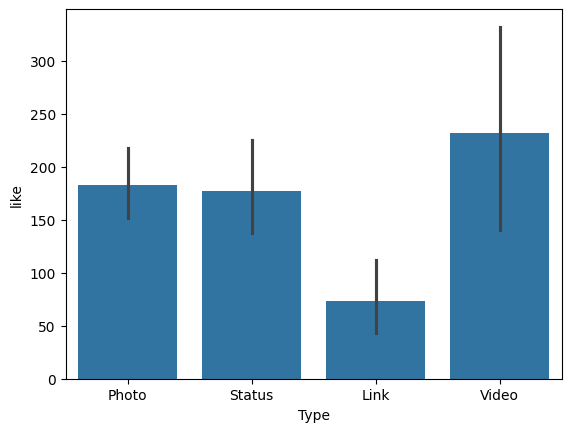

In [27]:
sns.barplot(x='Type', y='like', data=ds )

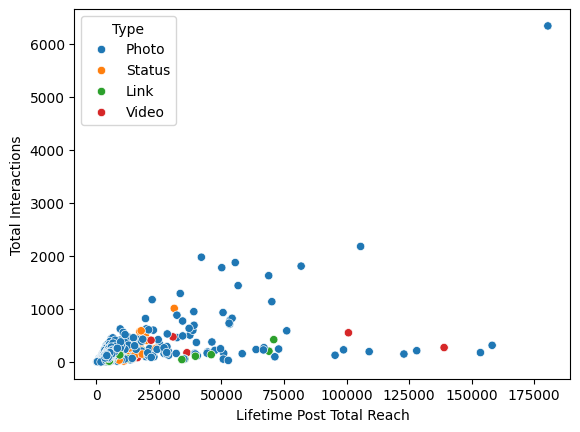

In [28]:
sns.scatterplot(x='Lifetime Post Total Reach', y='Total Interactions', hue='Type', data=ds)
plt.xlabel('Lifetime Post Total Reach')
plt.ylabel('Total Interactions')
plt.show()

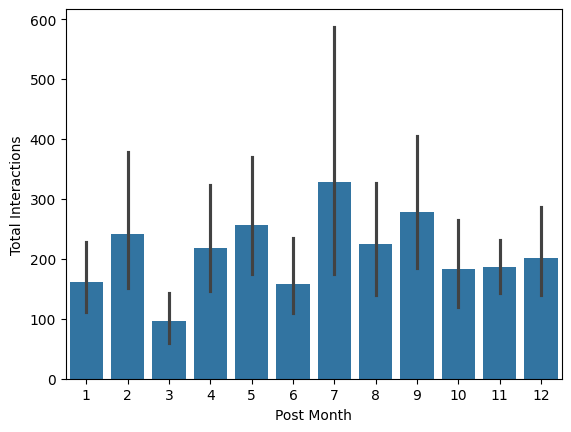

In [29]:
ds_barplot = sns.barplot(ds, x = "Post Month", y = "Total Interactions")

In [ ]:
sns.pairplot(ds)

In [5]:
sns.pairplot(ds11)

NameError: name 'ds11' is not defined

In [ ]:
# Add unique ID per row to enable row-wise merge
df['unique_id'] = df.index

# Prepare two dataframes to merge
df1 = df[["unique_id", "Type", "comment", "like", "share"]]
df2 = df[["unique_id", "Paid", "Lifetime Post Total Reach", "Lifetime Engaged Users"]]

# Merge on unique_id
merged_df = pd.merge(df1, df2, on='unique_id', how='inner')

print("Merged Data:")
print(merged_df.head())



In [ ]:
merged_df